<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Ridge/Dijkstra's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install heapdict
!pip install llist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 753.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for llist: filename=llist-0.7.1-cp310-cp310-linux_x86_64.whl size=74084 sha256=37068003ca3dafda41b8053d7f84705b9569e3209be6940da025913458bc09d2
  Stored in directory: /root/.cache/pip/wheels/e9/91/41/252becb26acf296e14913e0ee13940295bc475be57aed9bb2e
Successfully built llist


In [4]:
import networkx as nx
from heapdict import heapdict
import random
import matplotlib.pyplot as plt
from queue import LifoQueue
import time
from networkx.exception import NetworkXNoPath

In [5]:
def dijkstra(graph, start, end):

  parents = {}

  nodes = graph.nodes()

  heap = heapdict()
  for node in graph.nodes():
    heap[node] = float('inf')

  heap[start] = 0.0

  while heap:
    v = heap.popitem()
    node = v[0]
    dist = v[1]
    if node == end:
      break
    for neighbor, edge in graph[node].items():
      if neighbor in heap and dist + edge['weight'] < heap[neighbor]:
        heap[neighbor] = dist + edge['weight']
        parents[neighbor] = node

  stack = LifoQueue()
  i = end

  while True:
    try:
      stack.put(parents[i])
      i = parents[i]
    except KeyError as e:
      break

  path = []
  while not stack.empty():
    path.append(stack.get())

  path.append(end)

  return path


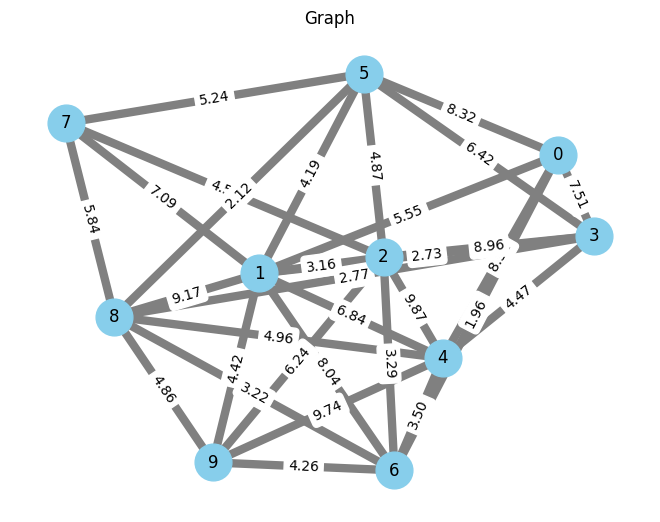

Network X shortest path from 5 to 5: [5] time: 0.0011169910430908203
Dijkstra's shortest path from 5 to 5: [5] time: 0.0007312297821044922


In [6]:
n = 10  # number of nodes
p = 0.5  # probability of an edge
G = nx.gnp_random_graph(n, p)

for (u, v) in G.edges():
  G.edges[u, v]['weight'] = random.uniform(1.0, 10.0)

nodes = list(G.nodes)  # Convert NodeView to a list to use with random.choice
start = random.choice(nodes)
end = random.choice(nodes)

pos = nx.spring_layout(G)  # positions for all nodes, creating a visually pleasing layout
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', width=6)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

# Show the graph
plt.title("Graph")
plt.show()

dstart = time.time()
dpath = dijkstra(G,start,end)
dend = time.time()
ddelta = dend-dstart
xstart = time.time()
xpath = nx.shortest_path(G, source=start, target=end, weight='weight')
xend = time.time()
xdelta = xend-xstart
print(f"Network X shortest path from {start} to {end}: {xpath} time: {xdelta}")
print(f"Dijkstra's shortest path from {start} to {end}: {dpath} time: {ddelta}")



In [7]:
n = 10  # number of nodes
p = 0.5  # probability of an edge

dtotal = 0.0
xtotal = 0.0

for i in range(0,1000):
  G = nx.gnp_random_graph(n, p)

  for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.uniform(1.0, 10.0)

  nodes = list(G.nodes)  # Convert NodeView to a list to use with random.choice
  start = random.choice(nodes)
  end = random.choice(nodes)

  xstart = time.time()
  try:
    xpath = nx.shortest_path(G, source=start, target=end, weight='weight')
  except NetworkXNoPath as e:
    continue

  xend = time.time()
  xdelta = xend-xstart

  dstart = time.time()
  dpath = dijkstra(G,start,end)
  dend = time.time()
  ddelta = dend-dstart

  assert dpath == xpath

  dtotal += ddelta
  xtotal += xdelta

print(dtotal/xtotal)

3.520984377641941
